In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/togo-dapaong_qc.csv") 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

1. Summary Statistics & Missing-Value Report

1.1 Summary Statistics

In [80]:
print(df.describe(include='all'))

               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-10-24 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     230.555040     151.258469     116.444352   
std                  NaN     322.532347     250.956962     156.520714   
min                  NaN     -12.700000       0.000000       0.000000   
25%                  NaN      -2.200000       0.000000       0.000000   
50%                  NaN       2.100000       0.000000       2.500000   
75%                  NaN     442.400000     246.400000     215.700000   
max                  NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  

In [81]:
number_stats = df.describe(include=[np.number])  # Only numeric columns
print(number_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

1.2 Missing-Value Report and removal

In [82]:
# Calculate and display the number and percentage of missing values for each column in the dataframe

missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values per Column:")
print(missing_values)
print("\nMissing Values (% of Total Data):")
print(missing_percentage)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values (% of Total Data):
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [83]:

# Check missing value percentage >5% and list columns

threshold = 5  # 5% threshold
cols_to_drop = missing_percentage[missing_percentage > threshold].index

print("Columns with > 5% missing values:")
print(cols_to_drop.tolist())


Columns with > 5% missing values:
['Comments']


In [84]:
# Drop col with missing value > 5%
df_clean = df.drop(columns=cols_to_drop)
print(df_clean.isna().sum())

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [85]:
print("Missing values after imputation:", df_clean.isna().sum().sum()," ",df_clean.isnull().sum())

Missing values after imputation: 0   Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


2. Outlier Detection & Basic Cleaning

2.1 Identify Negative Values (Invalid Entries)
For columns like GHI, DNI, DHI (irradiance cannot be negative):

In [86]:
# check for negative entries in all cols
negative_entries = df_clean[df_clean.select_dtypes(include='number') < 0].dropna(how='all')

print(negative_entries)

       Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaN -1.3  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaN -1.3  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaN -1.3  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaN -1.2  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaN -1.2  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
525595       NaN -0.8  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525596       NaN -0.9  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525597       NaN -1.0  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525598       NaN -1.1  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525599       NaN -1.2  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

        WD  WDstdev  BP  Cleaning  Precipitation  TModA  TModB 

In [89]:
# checking on the interest cols
negative_ghi = df_clean[df_clean['GHI'] < 0]
print(f"Negative GHI entries: {len(negative_ghi)}")

negative_dni = df_clean[df_clean['DNI'] < 0]
print(f"Negative DNI entries: {len(negative_dni)}")

negative_dhi = df_clean[df_clean['DHI'] < 0]
print(f"Negative DHI entries: {len(negative_dhi)}")

Negative GHI entries: 0
Negative DNI entries: 0
Negative DHI entries: 0


In [88]:
# Replace with zero
df_clean['GHI'] = df_clean['GHI'].clip(lower=0)


2.2 Outlier Detection and Imputation

In [90]:
# create key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

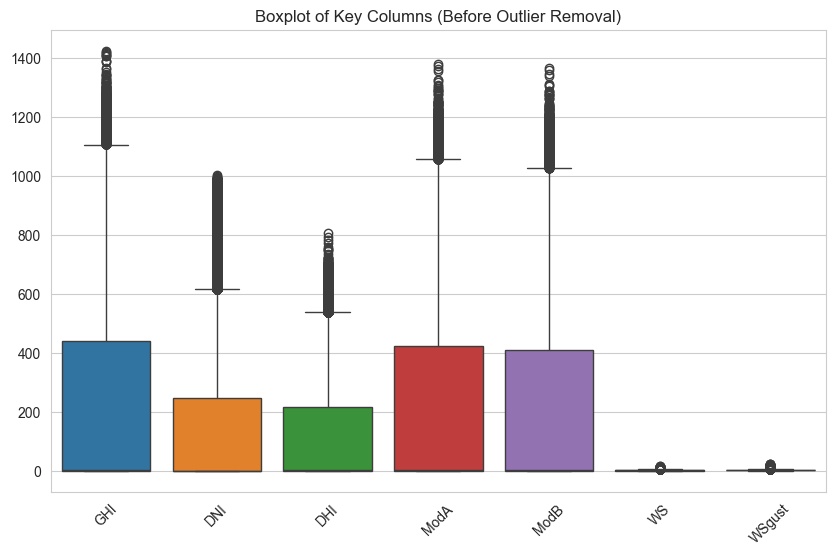

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[key_columns])
plt.title("Boxplot of Key Columns (Before Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [94]:
# Check outliers
from scipy import stats

# Calculate Z-scores for key columns
z_scores = df_clean[key_columns].apply(stats.zscore)

# Flag outliers (|Z| > 3)
outlier_flags = (np.abs(z_scores) > 3)
print("Number of outliers per column:")
print(outlier_flags.sum())

Number of outliers per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [93]:
# Enhanced outlier treatment: winsorization + iterative Z-score capping
from scipy.stats.mstats import winsorize

def treat_outliers_enhanced(df, columns, z_threshold=3, winsor_limits=0.01):
    """Combination winsorization + Z-score approach"""
    df_out = df.copy()
    
    # First pass: Winsorize extreme values
    for col in columns:
        df_out[col] = winsorize(df_out[col], limits=[winsor_limits, winsor_limits])
    
    # Second pass: Iterative Z-score treatment
    for _ in range(3):
        for col in columns:
            z = np.abs(stats.zscore(df_out[col]))
            median = df_out[col].median()
            df_out.loc[z > z_threshold, col] = median
    
    return df_out

df_clean = treat_outliers_enhanced(df_clean, key_columns)

d:\projects\TenAcademy\week0\solar-challenge-week1\venv\Lib\site-packages\numpy\_core\fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
d:\projects\TenAcademy\week0\solar-challenge-week1\venv\Lib\site-packages\numpy\_core\fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
d:\projects\TenAcademy\week0\solar-challenge-week1\venv\Lib\site-packages\numpy\_core\fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
d:\projects\TenAcademy\week0\solar-challenge-week1\venv\Lib\site-packages\numpy\_core\fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
d:\projects\TenAcademy\week0\solar-challenge-week1\v

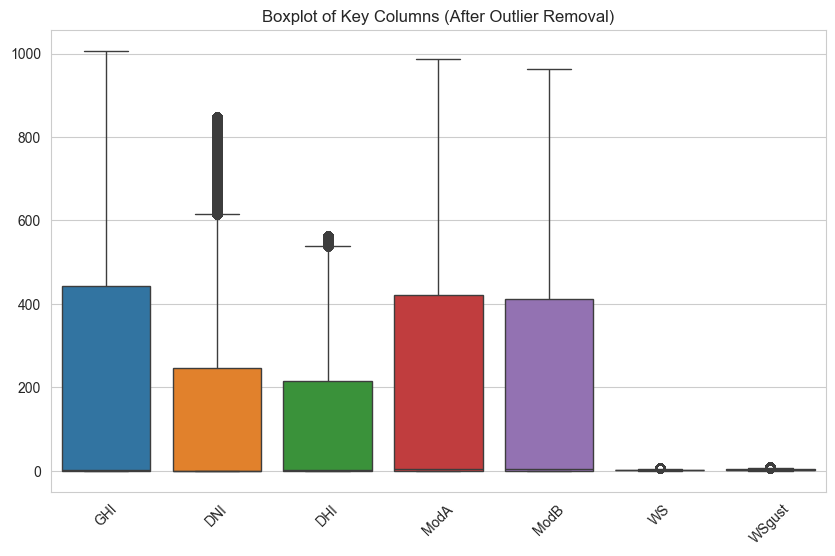

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[key_columns])
plt.title("Boxplot of Key Columns (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [42]:
#Export dataset

country = "togo"  
output_path = f"../data/{country}_clean.csv"
df_clean.to_csv(output_path, index=False)


3. Time Series Analysis

In [96]:
# Convert Timestamp column to datetime format if it's not already
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set Timestamp as index for time series plotting
df_clean.set_index('Timestamp', inplace=True)

<Figure size 1500x600 with 0 Axes>

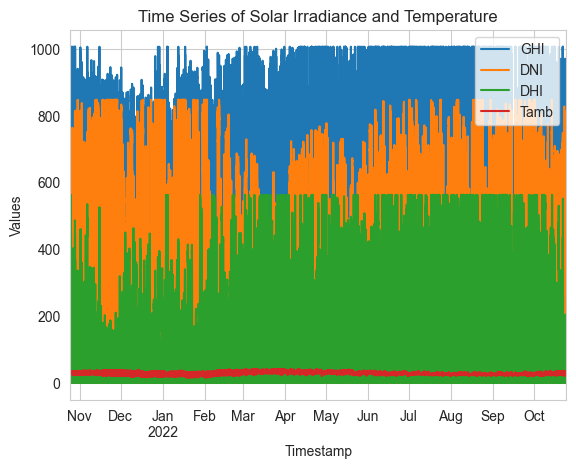

In [97]:
# Line chart of GHI, DNI, DHI, Tamb vs. Timestamp.
plt.figure(figsize=(15, 6))
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
plt.title('Time Series of Solar Irradiance and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Above chart is a vague and unclear,concentrated. I'm going to take the avergae value for each and compute the graph again by calculating avergae on month, hours for each column

In [98]:
# Daily averages
daily = df_clean.resample('D').mean()

# Monthly averages
monthly = df_clean.resample('ME').mean()

# Hourly averages (for diurnal patterns)
hourly = df_clean.groupby(df_clean.index.hour).mean()

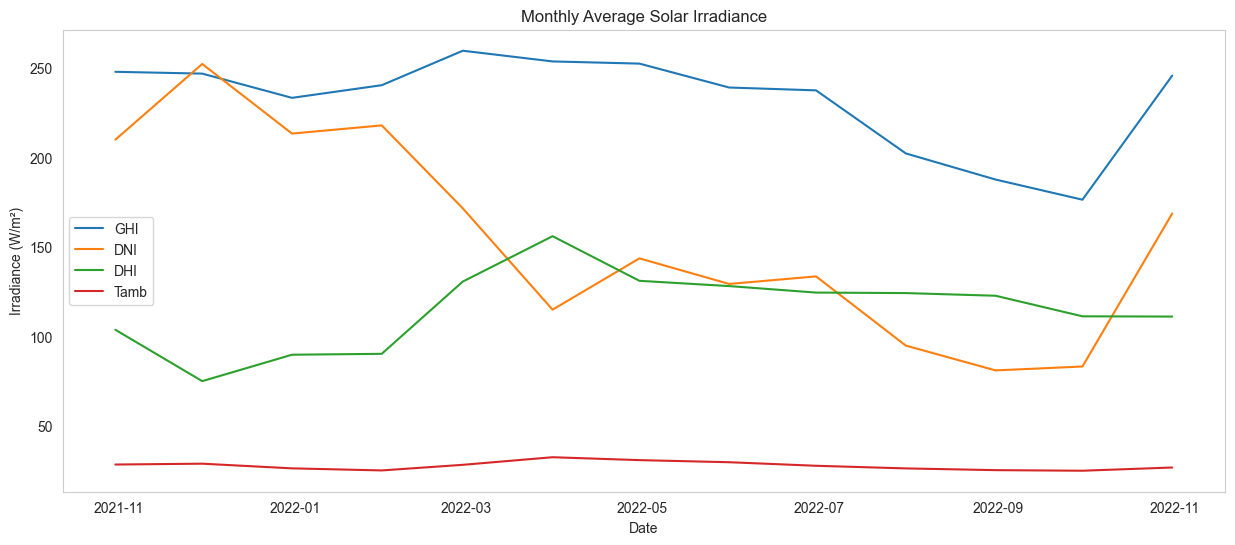

In [100]:
# Monthly chart
plt.figure(figsize=(15, 6))
plt.plot(monthly.index, monthly['GHI'], label='GHI')
plt.plot(monthly.index, monthly['DNI'], label='DNI')
plt.plot(monthly.index, monthly['DHI'], label='DHI')
plt.plot(monthly.index, monthly['Tamb'], label='Tamb')

plt.title('Monthly Average Solar Irradiance')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid()
plt.show()

Anomaly Detection and Removal in Time Series Analysis

In [101]:
print("Invalid DNI > GHI cases:", len(df_clean[df_clean["DNI"] > df_clean["GHI"]]))

Invalid DNI > GHI cases: 44142


In [103]:
# Flag invalid rows
invalid_mask = df_clean["DNI"] > df_clean["GHI"]

# Option C: Use median of valid DNI/GHI ratios
valid_ratio = (df_clean["DNI"] / df_clean["GHI"]).median()  # Typically ~0.6-0.8
df_clean.loc[invalid_mask, "DNI"] = df_clean.loc[invalid_mask, "GHI"] * valid_ratio

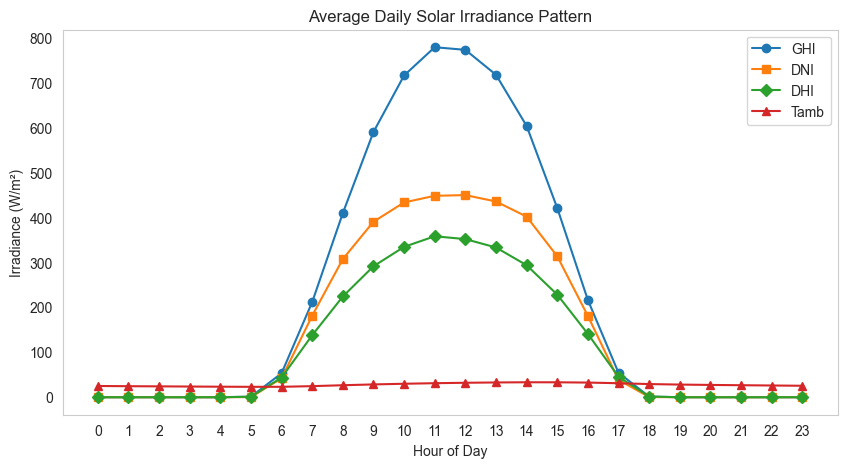

In [104]:
# Hourly Average Analysis
plt.figure(figsize=(10, 5))
plt.plot(hourly.index, hourly['GHI'], marker='o', label='GHI')
plt.plot(hourly.index, hourly['DNI'], marker='s', label='DNI')
plt.plot(hourly.index, hourly['DHI'], marker='D', label='DHI')
plt.plot(hourly.index, hourly['Tamb'], marker='^', label='Tamb')
plt.title('Average Daily Solar Irradiance Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Irradiance (W/m²)')
plt.xticks(range(0, 24))
plt.grid()
plt.legend()
plt.show()

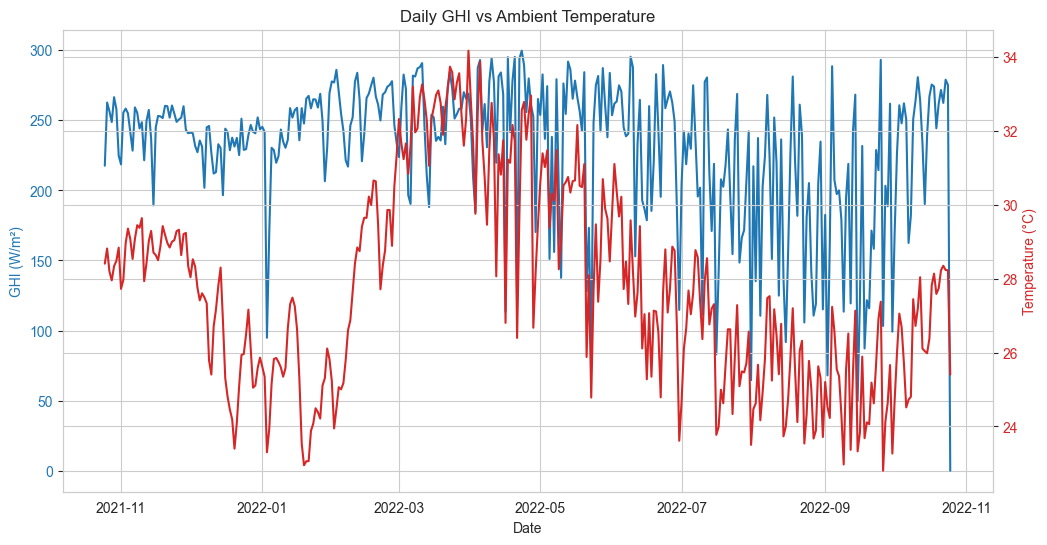

In [105]:
##trends
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('GHI (W/m²)', color='tab:blue')
ax1.plot(daily.index, daily['GHI'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (°C)', color='tab:red')
ax2.plot(daily.index, daily['Tamb'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Daily GHI vs Ambient Temperature')
plt.show()

In [106]:
# Calculate daily changes
daily_change = daily.pct_change()

# Flag anomalies (>3 standard deviations)
anomalies = daily_change[(np.abs(stats.zscore(daily_change)) > 3).any(axis=1)]
print("Anomalous Days Detected:")
print(anomalies)

Anomalous Days Detected:
Empty DataFrame
Columns: [GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []


4. Cleaning Impact

In [107]:

# Create copy of original data before cleaning
df_raw = pd.read_csv("../data/togo-dapaong_qc.csv")  # Original raw data
df_raw['Cleaning_flag'] = 0  # 0 = raw, 1 = cleaned

# Add flag to cleaned data
df_clean.loc[:, 'Cleaning_flag'] = 1  # Explicitly modifies the DataFrame
# df_clean['Cleaning_flag'] = 1

# Combine for comparison
df_combined = pd.concat([df_raw, df_clean])
# Convert Cleaning_flag to categorical for better plotting
df_combined['Cleaning_flag'] = df_combined['Cleaning_flag'].map({0: 'Raw', 1: 'Cleaned'})

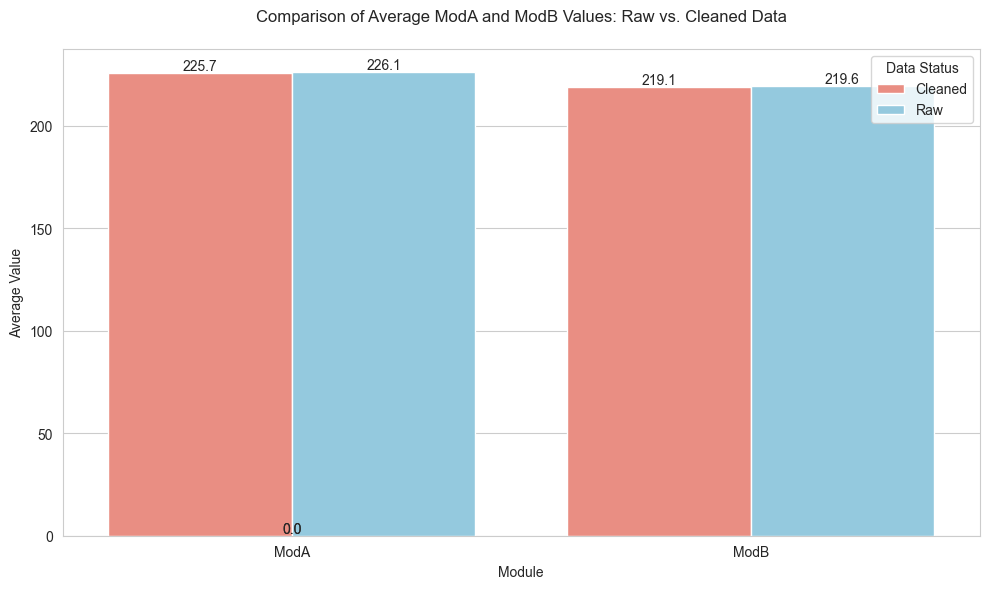

In [108]:
# Calculate average values by cleaning flag
avg_values = df_combined.groupby('Cleaning_flag')[['ModA', 'ModB']].mean().reset_index()

# Melt the dataframe for easier plotting with seaborn
avg_melted = avg_values.melt(id_vars='Cleaning_flag', 
                            value_vars=['ModA', 'ModB'],
                            var_name='Module', 
                            value_name='Average_Value')

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Bar plot
ax = sns.barplot(data=avg_melted, 
                x='Module', 
                y='Average_Value', 
                hue='Cleaning_flag',
                palette={'Raw': 'skyblue', 'Cleaned': 'salmon'})

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Customize the plot
plt.title('Comparison of Average ModA and ModB Values: Raw vs. Cleaned Data', pad=20)
plt.xlabel('Module')
plt.ylabel('Average Value')
plt.legend(title='Data Status')
plt.tight_layout()

# Show the plot
plt.show()

In [109]:
# Group by cleaning flag
stats_comparison = df_combined.groupby('Cleaning_flag')[['ModA', 'ModB']].describe()
print(stats_comparison)

                   ModA                                                  \
                  count        mean         std  min  25%  50%      75%   
Cleaning_flag                                                             
Cleaned        525600.0  225.676694  316.143448  0.0  0.0  4.4  422.525   
Raw            525600.0  226.144375  317.346938  0.0  0.0  4.4  422.525   

                           ModB                                                \
                  max     count        mean         std  min  25%  50%    75%   
Cleaning_flag                                                                   
Cleaned         988.0  525600.0  219.050527  306.583633  0.0  0.0  4.3  411.0   
Raw            1380.0  525600.0  219.568588  307.932510  0.0  0.0  4.3  411.0   

                       
                  max  
Cleaning_flag          
Cleaned         964.0  
Raw            1367.0  


5. Correlation & Relationship Analysis

5.1 Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

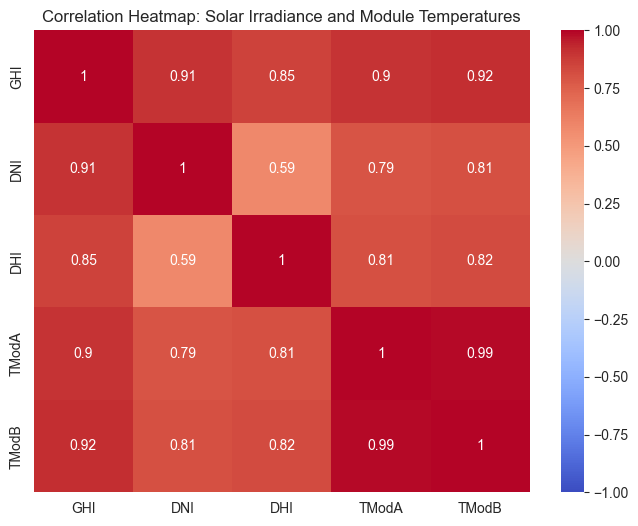

In [110]:
# Select relevant columns
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = df_clean[columns_of_interest]

#  Compute correlation matrix
corr_matrix = corr_data.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Solar Irradiance and Module Temperatures')
plt.show()

5.2 Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

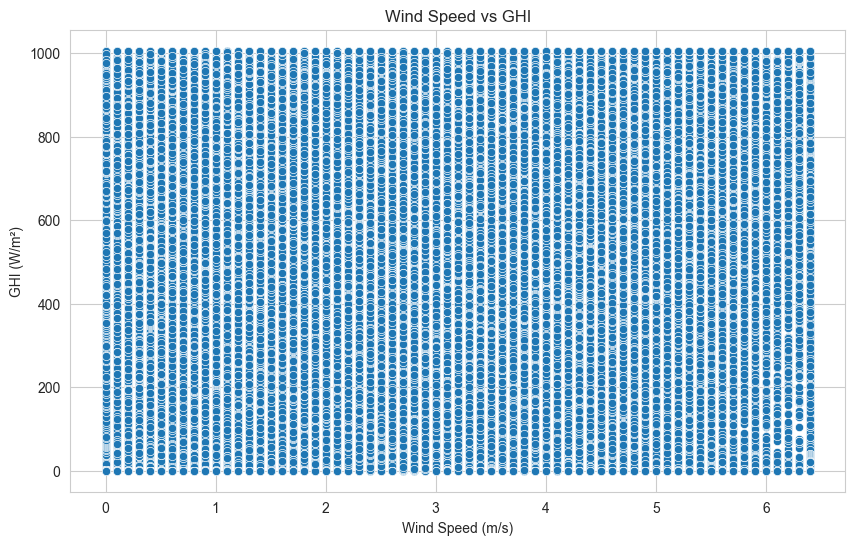

In [111]:
# WS vs GHI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title('Wind Speed vs GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

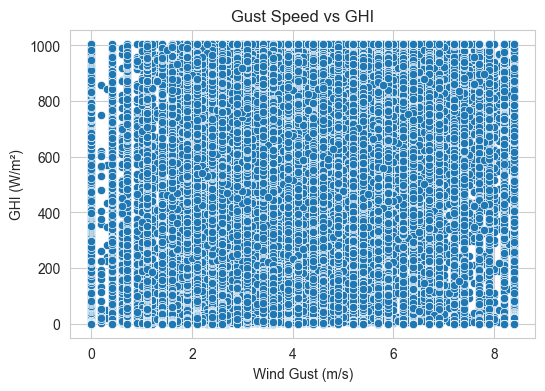

In [112]:
# WSgust vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title('Gust Speed vs GHI')
plt.xlabel('Wind Gust (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

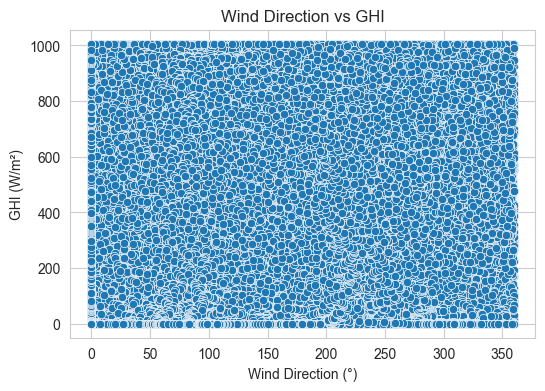

In [113]:
# WD vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title('Wind Direction vs GHI')
plt.xlabel('Wind Direction (°)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

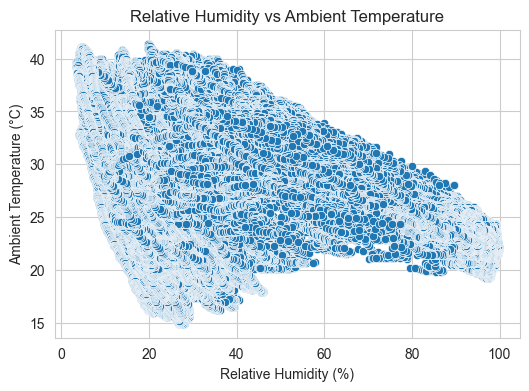

In [114]:
# RH vs Tamb
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()

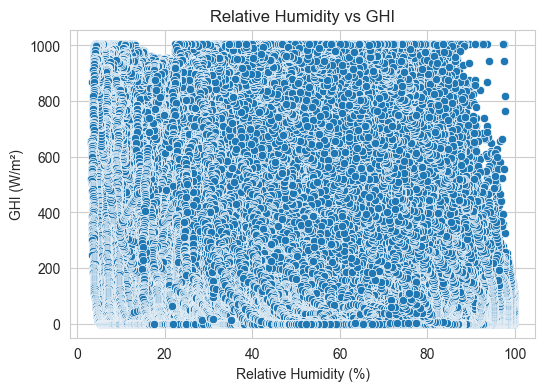

In [115]:

# RH vs GHI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RH', y='GHI', data=df_clean)
plt.title('Relative Humidity vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

6. Wind & Distribution Analysis

6.1 Wind rose or radial bar plot of WS/WD.

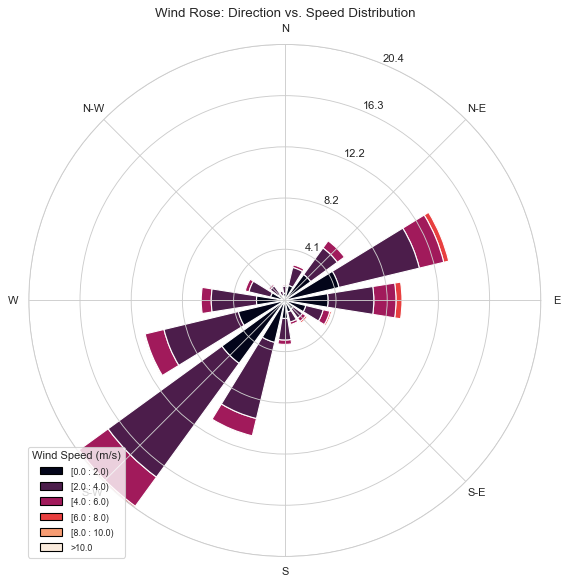

In [116]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

wind_data = df_clean[(df_clean['WS'] >= 0.5) & (df_clean['WD'].notna())]
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], 
       normed=True, opening=0.8, edgecolor='white', bins=np.arange(0, 12, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose: Direction vs. Speed Distribution')
plt.show()

6.2 Histograms for GHI and one other variable (e.g. WS).

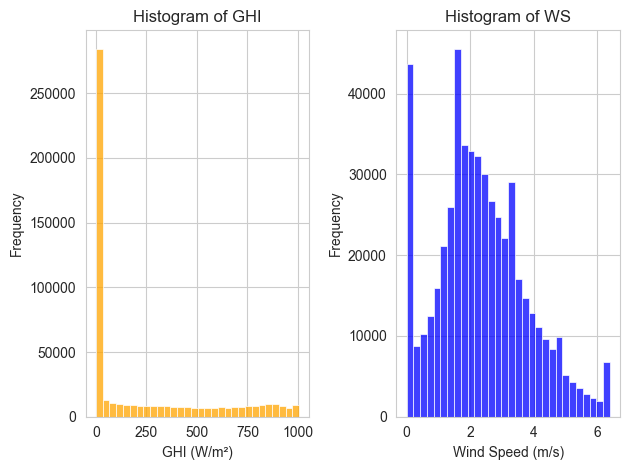

In [117]:
# Histogram for GHI vs Ws
plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=30, kde=False, color='orange')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=30, kde=False, color='blue')
plt.title('Histogram of WS')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

7. Temperature Analysis

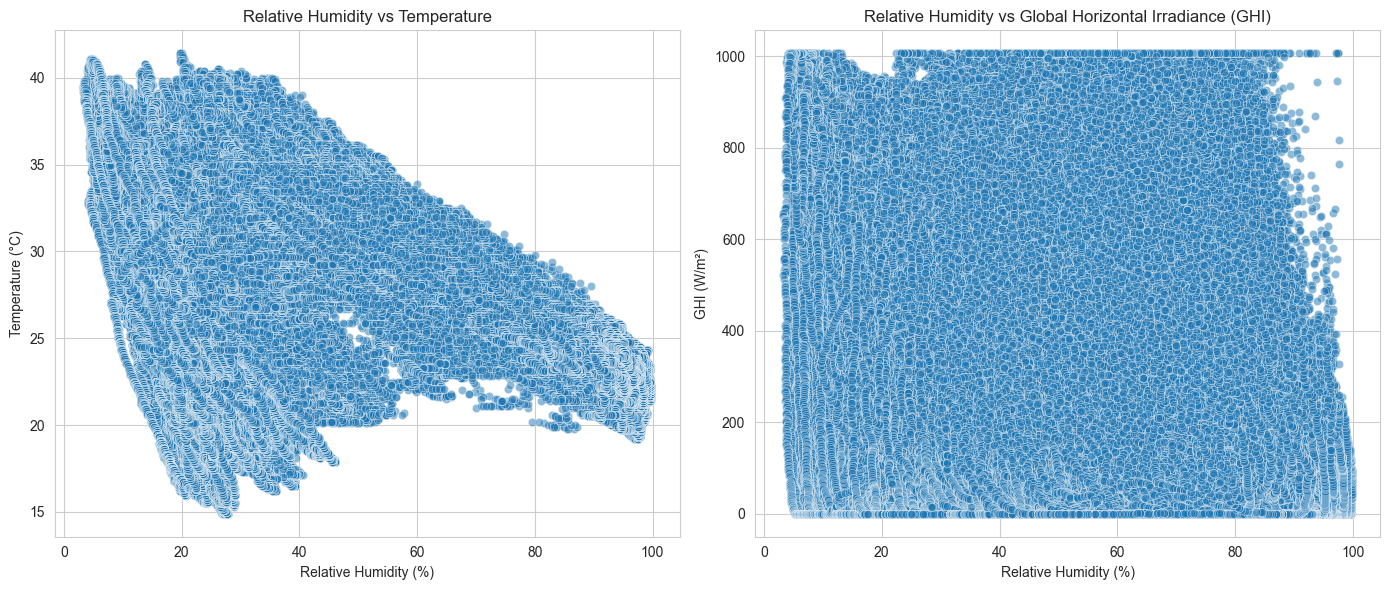

In [118]:
plt.figure(figsize=(14, 6))

# RH vs Temperature
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.5)
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')

# RH vs Solar Radiation
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.5)
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')

plt.tight_layout()
plt.show()

In [120]:
print("Correlation between RH and Temperature:", df_clean['RH'].corr(df_clean['Tamb']))
print("Correlation between RH and GHI:", df_clean['RH'].corr(df_clean['GHI']))

Correlation between RH and Temperature: -0.4004104673516293
Correlation between RH and GHI: -0.2620055760029402


8. Bubble Chart

8.1 GHI vs. Tamb with bubble size = RH or BP.

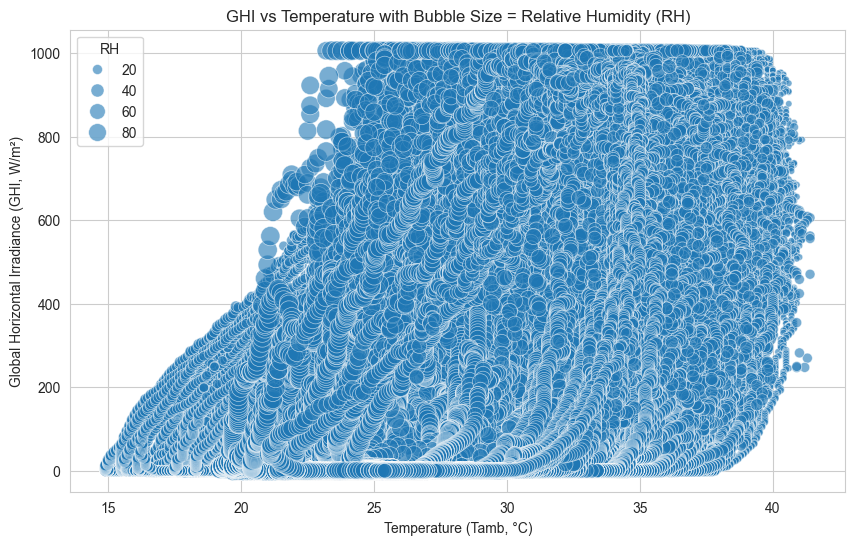

In [121]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Tamb',
    y='GHI',
    size='RH',  # or 'BP' if you want pressure instead
    sizes=(20, 200),  # Min and max bubble size
    alpha=0.6,
    data=df_clean,
    legend='brief'
)

plt.xlabel('Temperature (Tamb, °C)')
plt.ylabel('Global Horizontal Irradiance (GHI, W/m²)')
plt.title('GHI vs Temperature with Bubble Size = Relative Humidity (RH)')
plt.show()